# Data Match Analysing
## Introduction
>its' a data gathering most of clubs and players around countries in different leagues around world in host country from season 2008 to 2016
## Questions
>1- How many **leagues** in data? <br>
2- Which league has a **high scoring** matches? <br>
3- what's the most **scoring club** in most scoring  league? <br>
4- what's the players **coordinates** for the most scoring league? <br>
5- Is there a relation between **players coordinates** and **chance to win**? <br>
6- Is there a relation between **numbers of players** and **scoring more gools**?

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

In [2]:
#read CSV file
df = pd.read_csv('match.csv/Match.csv')

#set display options
pd.set_option('display.max_columns', 85)
df.shape

(25979, 85)

In [3]:
df.head(10)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
0,1,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492473,KRC Genk,Beerschot AC,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Belgium,Belgium Jupiler League,2008/2009,1,17/08/2008 0:00,492476,KAA Gent,RAEC Mons,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492477,FCV Dender EH,Standard de Liège,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Belgium,Belgium Jupiler League,2008/2009,1,24/09/2008 0:00,492478,KV Mechelen,Club Brugge KV,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008 0:00,492479,KSV Roeselare,KV Kortrijk,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Belgium,Belgium Jupiler League,2008/2009,1,16/08/2008

### Cleaning Data

In [4]:
#know how many duplicated and nan data
df.duplicated().sum(), df.isnull().sum()

(0,
 id                0
 country_id        0
 league_id         0
 season            0
 stage             0
               ...  
 foulcommit    11762
 card          11762
 cross         11762
 corner        11762
 possession    11762
 Length: 85, dtype: int64)

### Set suitable null values
>**first** fill null values with median to resist outliers for quantitative data<br>
**second** fill null values with (no data) value for categorical data

In [5]:
#make data frame for only null floats values to facilitate gain median
float_columns = df.select_dtypes(include=['float64'])
#replace null values with median
df.fillna(float_columns.median(), inplace= True)

In [6]:
df.fillna({'corner' : "no corners", 'card' : 'no cards', 'cross' : 'no cross','goal' : df['home_team_goal'] + df['away_team_goal'], 'foulcommit' : 'no foul', 'possession' : 'no data', 'shotoff' : 'no data', 'shoton' : 'no data'}, inplace= True)

In [7]:
#see if cleaning work
df.sample()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
20966,20967,Scotland,Scotland Premier League,2013/2014,3,17/08/2013 0:00,1474143,Hibernian,Dundee United,1,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,22962.0,300527.0,23507.0,112123.0,32630.0,35972.0,41432.0,32618.0,32559.0,23104.0,189075.0,13471.0,162548.0,25131.0,166423.0,357880.0,36610.0,237563.0,243160.0,34447.0,172186.0,32465.0,2,no data,no data,no foul,no cards,no cross,no corners,no data


## let's make **EDA**(Exploratory Data Analysis)

### Q1
> How many **leagues** and some analysis?

In [8]:
df['league_id'].unique()

array(['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League'], dtype=object)


### Q2
> Which league has a **high scoring** matches?

In [37]:
#function to put plot data
def plotting_data(xlabel, ylabel, title):
    [plot for plot in [mm.set_xlabel(xlabel), mm.set_ylabel(ylabel), plt.title(title), plt.legend()]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


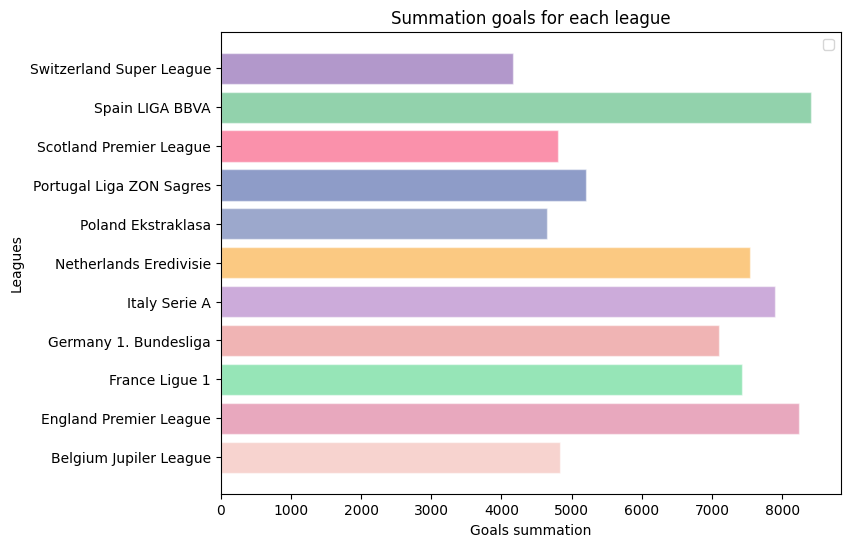

In [93]:
#ploting leagues to find which league has a high intensity of scoring
fig, mm = plt.subplots(figsize =(8,6))
hex_colors = ["#F1A9A0", "#D2527F", "#2ECC71", "#E26A6A", "#9B59B6", "#F89406", "#3A539B", "#1F3A93", "#F62459", "#26A65B", "#663399"]
plt.barh(df['league_id'].unique(), df.groupby('league_id')['home_team_goal'].sum() + df.groupby('league_id')['away_team_goal'].sum(),
         alpha= 0.5, color= hex_colors, edgecolor= 'white')
plotting_data('Goals summation', 'Leagues', 'Summation goals for each league')

### Q3
> what's the most **scoring club** in spain league?

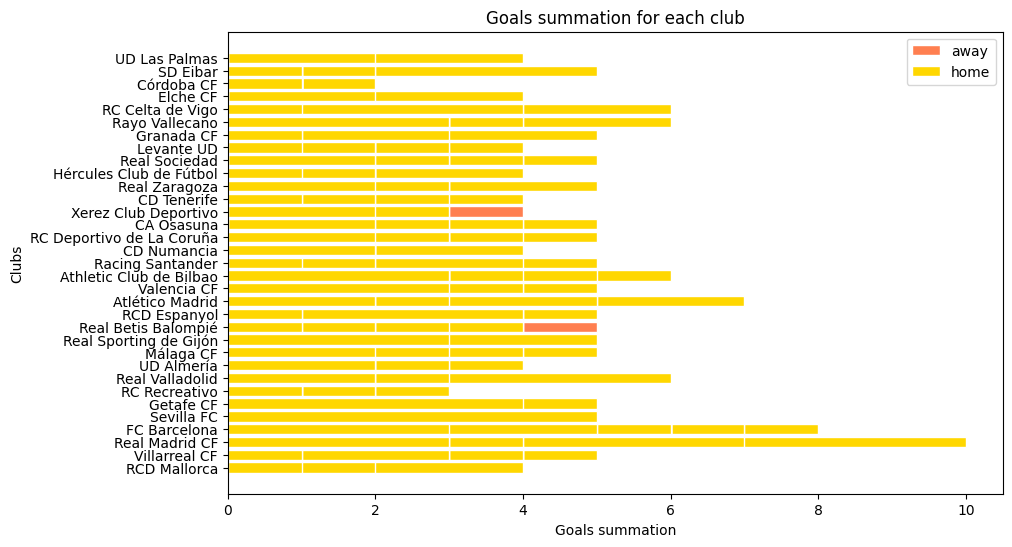

In [39]:
#plotting spain league clubs to show the most scoring one
fig, mm = plt.subplots(figsize =(10,6))
plt.barh(df[df['league_id'] == 'Spain LIGA BBVA']['away_team_api_id'], df[df['league_id'] == 'Spain LIGA BBVA']['away_team_goal'],  color= '#FF7F50', label= 'away', edgecolor= 'white')
plt.barh(df[df['league_id'] == 'Spain LIGA BBVA']['home_team_api_id'], df[df['league_id'] == 'Spain LIGA BBVA']['home_team_goal'],  color= '#FFD700', label= 'home', edgecolor= 'white')
plotting_data('Goals summation', 'Clubs', 'Goals summation for each club')

### Q4
> what's the players **coordinates** for the most scoring club in Spain league?

In [43]:
#function make scatter plot for club coordinates
def scatter_players_coordinates(club, category, color, label):
    plt.scatter(df[df['home_team_api_id'] == club][[f'{category}_player_X{player_num}' for player_num in range(1, 12)]],
                df[df['home_team_api_id'] == club][[f'{category}_player_Y{player_num}' for player_num in range(1, 12)]],
                edgecolor= 'black', color= color, label= label)

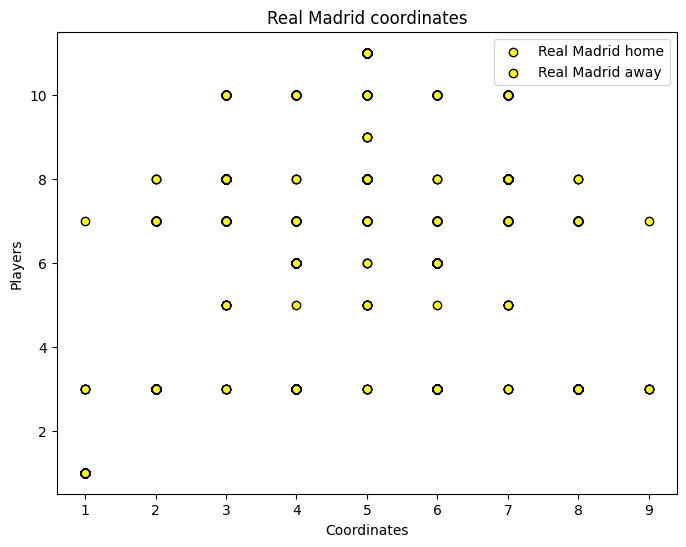

In [46]:
#plottin spain Real Madrid players coordinates
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates('Real Madrid CF', 'home', '#FFFF00', 'Real Madrid home')
scatter_players_coordinates('Real Madrid CF', 'away', '#dec3c3', 'Real Madrid away')
plotting_data('Coordinates', 'Players', 'Real Madrid coordinates')

### Q5
> Is there a relation between **players coordinates** and **chance to win**?

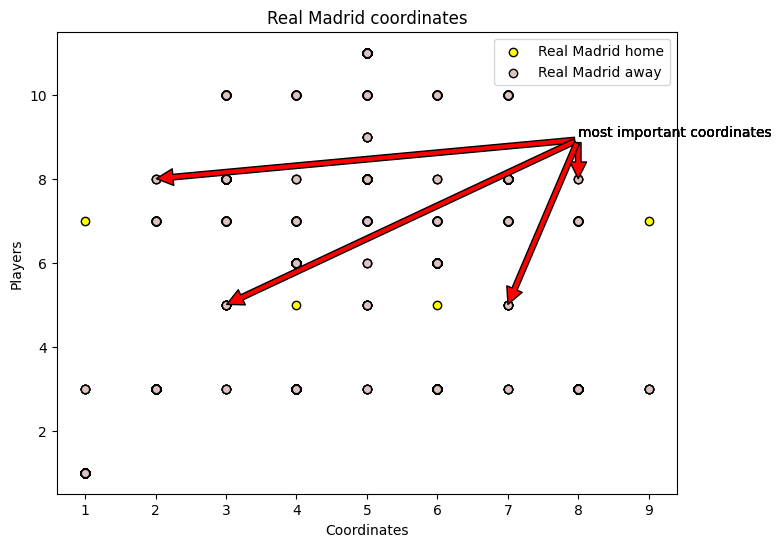

In [50]:
#plotting spain Real Madrid players coordinates
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates('Real Madrid CF', 'home', '#FFFF00', 'Real Madrid home')
scatter_players_coordinates('Real Madrid CF', 'away', '#dec3c3', 'Real Madrid away')
#annotate important coordinate points[(2, 8), (3, 5), (8, 8), (7, 5)]
[plt.annotate('most important coordinates', xy= point, arrowprops= {'facecolor' : 'red', 'shrink' : 0.002}, xytext= (8, 9)) for point in [(2, 8), (3, 5), (8, 8), (7, 5)]]
plotting_data('Coordinates', 'Players', 'Real Madrid coordinates')

According to last plot -> If we connect these four points will make trapezium shape, if this shape concentrated with coordinates emphasizly these four points [(2, 8), (3, 5), (8, 8), (7, 5)] that make chance to score more goals increase

Let's prove the relation with any another club coordinate (any another club will be less goals than Real Madrid look at Q3 above)

Let's compare any club players coordinte with most scoring club in all data frame

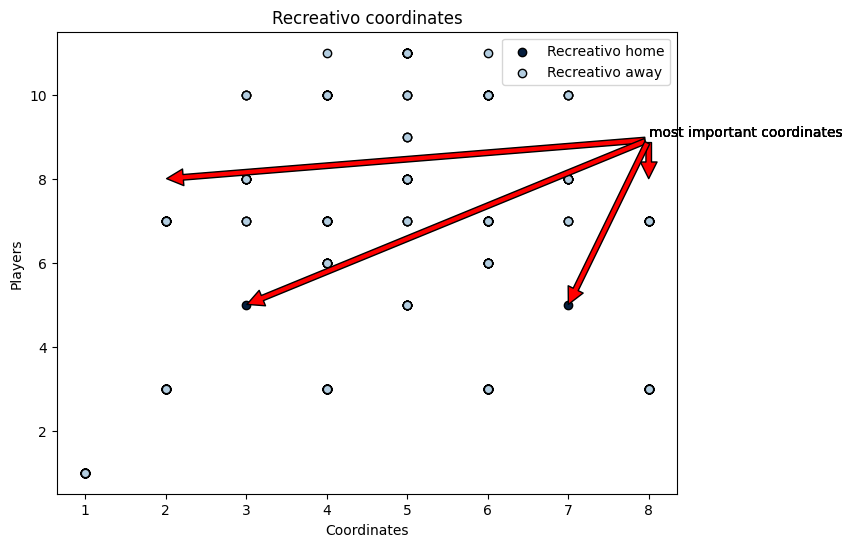

In [51]:
#plotting Recreativo players coordinates
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates('RC Recreativo', 'home', '#051e3e', 'Recreativo home')
scatter_players_coordinates('RC Recreativo', 'away', '#b3cde0', 'Recreativo away')
#annotate important coordinate points[(2, 8), (3, 5), (8, 8), (7, 5)]
[plt.annotate('most important coordinates', xy= point, arrowprops= {'facecolor' : 'red', 'shrink' : 0.002}, xytext= (8, 9)) for point in [(2, 8), (3, 5), (8, 8), (7, 5)]]
plotting_data('Coordinates', 'Players', 'Recreativo coordinates')

This plot shows that 'Recreativo' club has no coordinates in four important points [(2, 8), (3, 5), (8, 8), (7, 5)], and low concentration coordinate in this trapezium shape so it has low number of scoring goals

Let's make another comparison for the closest club to 'Real Madrid; in goals is 'Barcelona' with deference 2 goals according to Q3

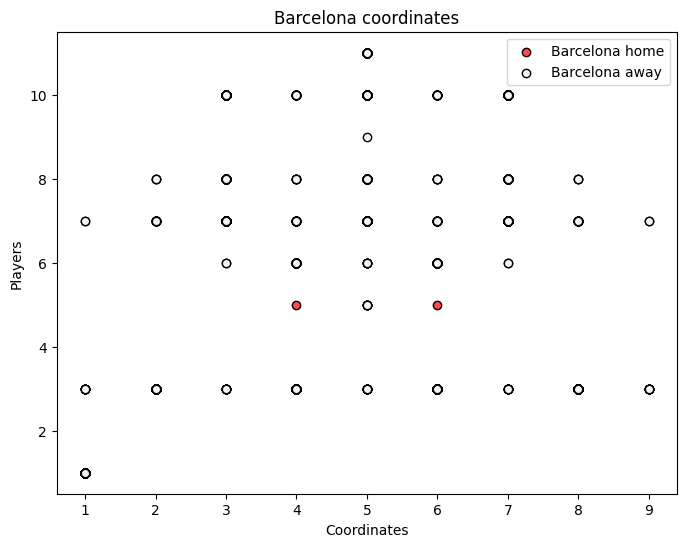

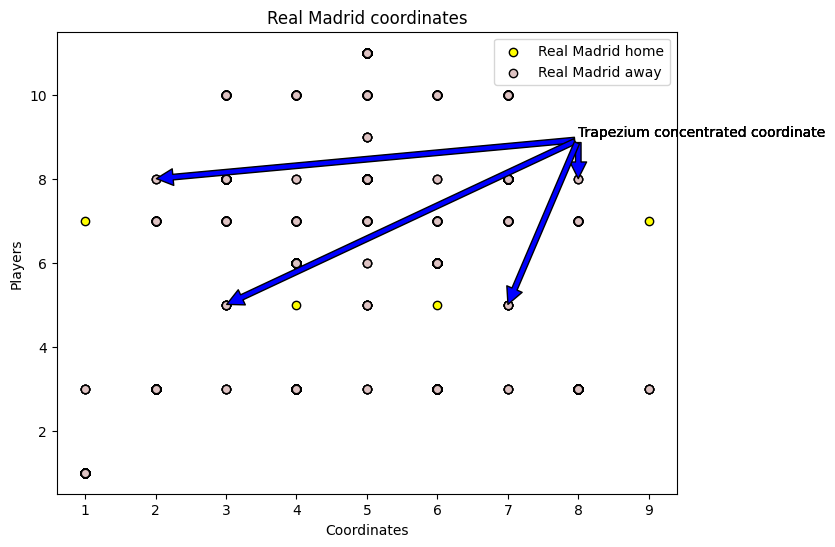

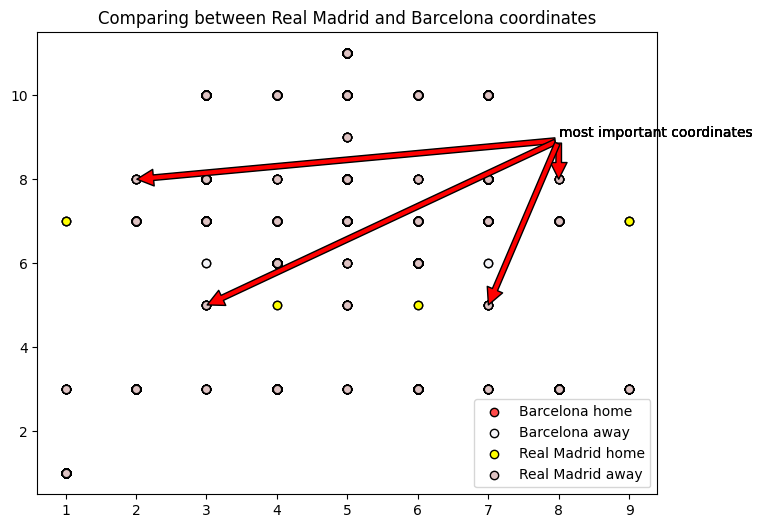

In [57]:
#plotting of Barcelona
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates('FC Barcelona', 'home', '#fe4a49', 'Barcelona home')
scatter_players_coordinates('FC Barcelona', 'away', '#f4f4f8', 'Barcelona away')
plotting_data('Coordinates', 'Players', 'Barcelona coordinates')
#plotting of Real Madrid
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates('Real Madrid CF', 'home', '#FFFF00', 'Real Madrid home')
scatter_players_coordinates('Real Madrid CF', 'away', '#dec3c3', 'Real Madrid away')
plotting_data('Coordinates', 'Players', 'Real Madrid coordinates')
#plotting to compare
fig, mm = plt.subplots(figsize =(8,6))
#Barcelona coordinate
scatter_players_coordinates('FC Barcelona', 'home', '#fe4a49', 'Barcelona home')
scatter_players_coordinates('FC Barcelona', 'away', '#f4f4f8', 'Barcelona away')
#Real Madrid coordinate
scatter_players_coordinates('Real Madrid CF', 'home', '#FFFF00', 'Real Madrid home')
scatter_players_coordinates('Real Madrid CF', 'away', '#dec3c3', 'Real Madrid away')
#annotate important coordinate points[(2, 8), (3, 5), (8, 8), (7, 5)]
[plt.annotate('most important coordinates', xy= point, arrowprops= {'facecolor' : 'red', 'shrink' : 0.002}, xytext= (8, 9)) for point in [(2, 8), (3, 5), (8, 8), (7, 5)]]
plotting_data('Coordinates', 'Players', 'Comparing between Real Madrid and Barcelona coordinates')

According to last comparison we conclude that <br>
> 1- the concentration of coordinates for 'Real Madrid' is more than 'Barcelona' by 2 points ('Real Madrid' = 22 point, 'Barcelona' = 20 point) in trapezium[(2, 8), (3, 5), (8, 8), (7, 5)] <br>
> 2- 'Real Madrid' take control at [(3, 5), (7, 5)] points while 'Barcelona' not <br>

**that make 'Real Madrid' more scorer than 'Barcelona'**

Another comparison 

### Q6
> Is there a relation between **numbers of players** and **scoring more gools**?

In [15]:
#function makes horizontal bar for players numbers
def barh_players_numbers(club, category, color, label):
    plt.barh([f'player_{player_num}' for player_num in range(1, 12)], 
         [df[df['home_team_api_id'] == club][f'{category}_player_{player_num}'].iloc[0]  for player_num in range(1, 12)], 
         color= color, label= label)

In [129]:
#let's make array for Real Madrid to get mean of it's players numbers
real_array = np.array([df[df['home_team_api_id'] == 'Real Madrid CF'][f'home_player_{player_num}'].iloc[0]  for player_num in range(1, 12)] + 
                [df[df['home_team_api_id'] == 'Real Madrid CF'][f'away_player_{player_num}'].iloc[0]  for player_num in range(1, 12)]).mean()
#let's make array for Barcelona to get mean of it's players numbers
barcelona_array = np.array([df[df['home_team_api_id'] == 'FC Barcelona'][f'home_player_{player_num}'].iloc[0]  for player_num in range(1, 12)] + 
                [df[df['home_team_api_id'] == 'FC Barcelona'][f'away_player_{player_num}'].iloc[0]  for player_num in range(1, 12)]).mean()

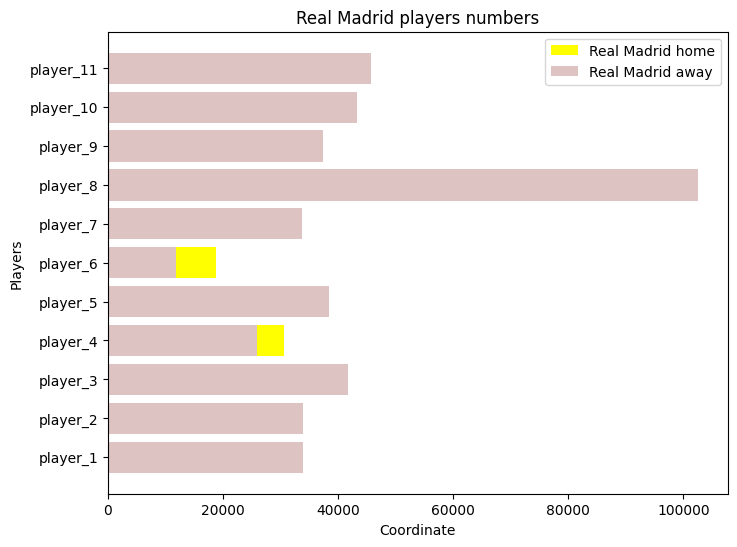

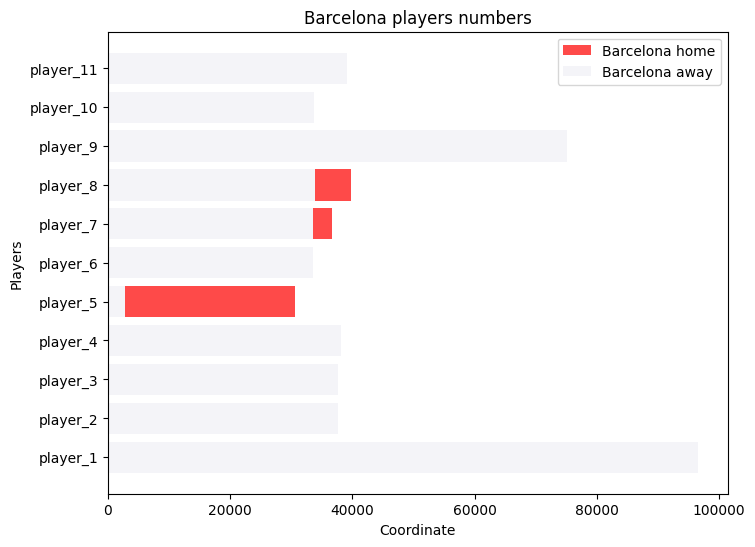

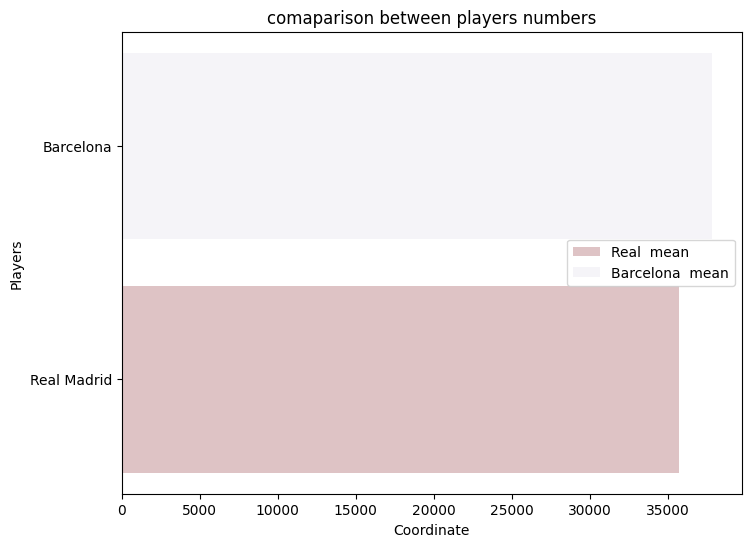

In [136]:
#plotting of Real Madrid
fig, mm = plt.subplots(figsize =(8,6))
barh_players_numbers('Real Madrid CF', 'home', '#FFFF00', 'Real Madrid home')
barh_players_numbers('Real Madrid CF', 'away', '#dec3c3', 'Real Madrid away')
plotting_data('Coordinate', 'Players', 'Real Madrid players numbers')
#plotting of Barcelona
fig, mm = plt.subplots(figsize =(8,6))
barh_players_numbers('FC Barcelona', 'home', '#fe4a49', 'Barcelona home')
barh_players_numbers('FC Barcelona', 'away', '#f4f4f8', 'Barcelona away')
plotting_data('Coordinate', 'Players', 'Barcelona players numbers')
#comparison plotting 
fig, mm = plt.subplots(figsize =(8,6))
plt.barh('Real Madrid', real_array, color = '#dec3c5', label= 'Real  mean')
plt.barh('Barcelona', barcelona_array, color= '#f5f4f8', label= 'Barcelona  mean')
plotting_data('Coordinate', 'Players', 'comaparison between players numbers')

According to last plot we can take **players numbers** as a second relation if the coordinate of home and away club congruent 

Let's see that at Match has id (20562) two clubs are same at coordinate

In [126]:
df[df['id'] == 20562]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
20561,20562,Scotland,Scotland Premier League,2011/2012,37,06/05/2012 0:00,1189737,Heart of Midlothian,St. Johnstone FC,2,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,115675.0,94467.0,39223.0,37307.0,32891.0,75373.0,32553.0,32681.0,32593.0,34945.0,24449.0,14100.0,32725.0,35968.0,32484.0,23186.0,17528.0,23127.0,47575.0,32559.0,56852.0,195585.0,2,no data,no data,no foul,no cards,no cross,no corners,no data


We see that home team score more goals, so let's show the coordinates and players numbers

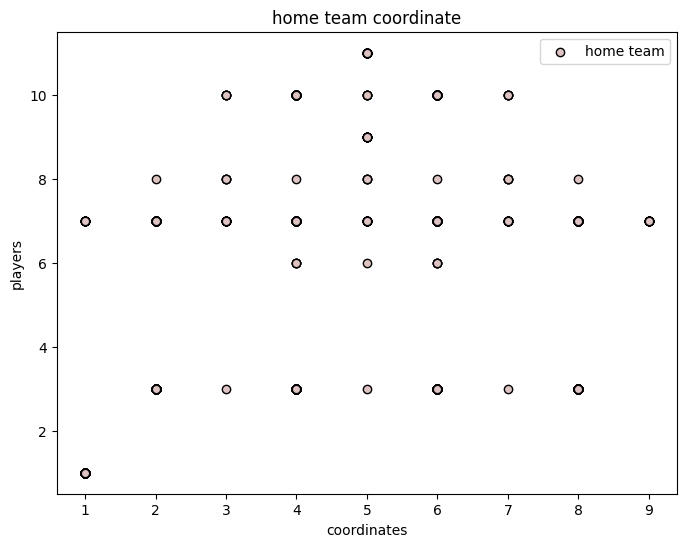

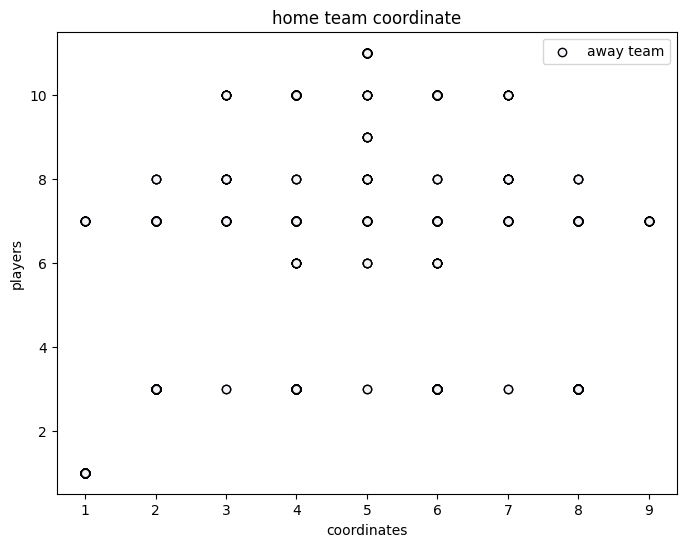

In [137]:
#plotting home team coordinates
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates(df[df['id'] == 20562]['home_team_api_id'].iloc[0], 'home', '#dec3c3', 'home team')
plotting_data('coordinates', 'players', 'home team coordinate')

fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates(df[df['id'] == 20562]['away_team_api_id'].iloc[0], 'away', '#f4f4f8', 'away team')
plotting_data('coordinates', 'players', 'home team coordinate')

Same coordinate so let's see second relation (players numbers mean)

In [138]:
#make array for home team to get players number mean
home_array = np.array([df[df['home_team_api_id'] == 'Real Madrid CF'][f'home_player_{player_num}'].iloc[0]  for player_num in range(1, 12)]).mean()
#let's make array for Barcelona to get mean of it's players numbers
away_array = np.array([df[df['home_team_api_id'] == 'FC Barcelona'][f'away_player_{player_num}'].iloc[0]  for player_num in range(1, 12)]).mean()

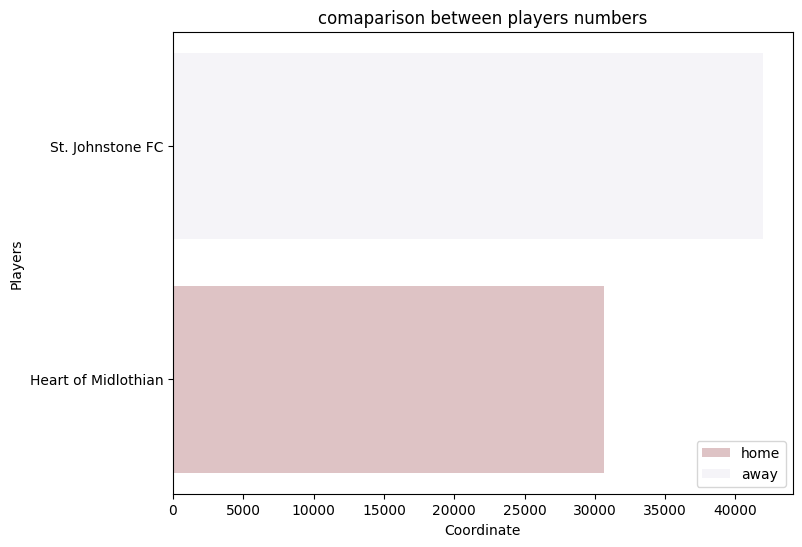

In [139]:
#plot comparison between players numbers to see the relation is right or not
fig, mm = plt.subplots(figsize =(8,6))
plt.barh(df[df['id'] == 20562]['home_team_api_id'].iloc[0], home_array, color = '#dec3c5', label= 'home')
plt.barh(df[df['id'] == 20562]['away_team_api_id'].iloc[0], away_array, color= '#f5f4f8', label= 'away')
plotting_data('Coordinate', 'Players', 'comaparison between players numbers')

We conclude that from last plots:
>1- If players numbers of team deacrease that make more ability to score more goals

In [17]:
df.sample()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession
15437,15438,Netherlands,Netherlands Eredivisie,2015/2016,11,31/10/2015 0:00,1983366,De Graafschap,PSV,3,6,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,467024.0,209418.0,586678.0,240788.0,166065.0,186923.0,298933.0,179208.0,32593.0,149211.0,248154.0,150236.0,207642.0,184821.0,70812.0,389845.0,178765.0,467495.0,31045.0,158581.0,150201.0,289441.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>29</comment><stats...


Text(0.5, 1.0, 'away coordinates')

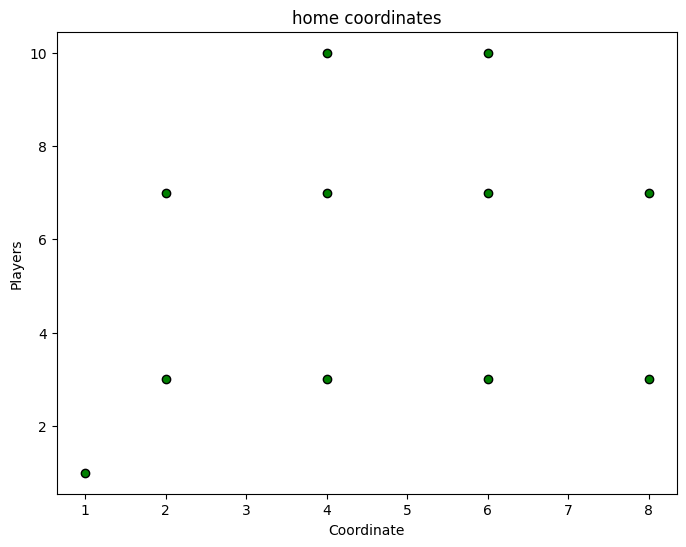

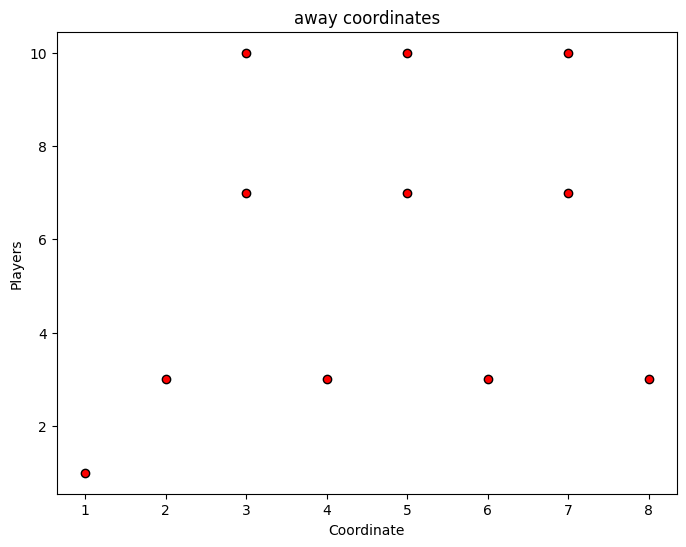

In [86]:
df[df['id'] == 9312]
fig, CL = plt.subplots(figsize =(8,6))
plt.scatter(df[df['id'] == 15438][['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11']],
            df[df['id'] == 15438][['home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11']],
           edgecolor= 'black', color= 'g')
CL.set_xlabel('Coordinate')
CL.set_ylabel('Players')
plt.title('home coordinates')
fig, CL = plt.subplots(figsize =(8,6))
plt.scatter(df[df['id'] == 15438][['away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11']],
            df[df['id'] == 15438][['away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11']],
           edgecolor= 'black', color= 'r')
CL.set_xlabel('Coordinate')
CL.set_ylabel('Players')
plt.title('away coordinates')

Text(0.5, 1.0, 'away coordinates')

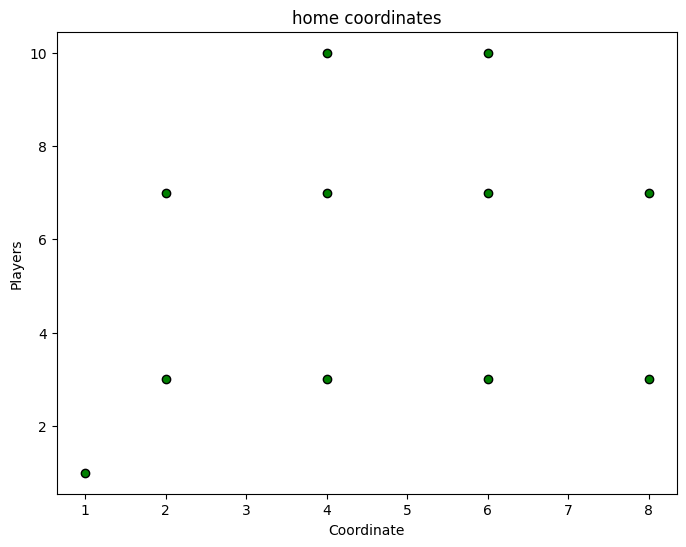

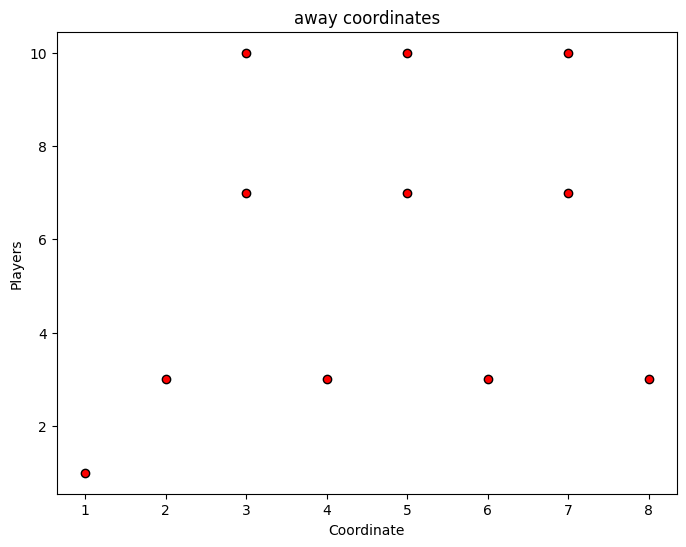

In [87]:
df[df['id'] == 9312]
fig, CL = plt.subplots(figsize =(8,6))
plt.scatter(df[df['id'] == 15438][['home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11']],
            df[df['id'] == 15438][['home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11']],
           edgecolor= 'black', color= 'g')
CL.set_xlabel('Coordinate')
CL.set_ylabel('Players')
plt.title('home coordinates')
fig, CL = plt.subplots(figsize =(8,6))
plt.scatter(df[df['id'] == 15438][['away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11']],
            df[df['id'] == 15438][['away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11']],
           edgecolor= 'black', color= 'r')
CL.set_xlabel('Coordinate')
CL.set_ylabel('Players')
plt.title('away coordinates')

## Conclusion
>

We have clean our data and make plots to see the relation between scoring more goals and player coordinate and number to see the coorelation key to score more goals

### First let's answer Question we have asked
**Q1** -> ['Belgium Jupiler League', 'England Premier League',
       'France Ligue 1', 'Germany 1. Bundesliga', 'Italy Serie A',
       'Netherlands Eredivisie', 'Poland Ekstraklasa',
       'Portugal Liga ZON Sagres', 'Scotland Premier League',
       'Spain LIGA BBVA', 'Switzerland Super League']e'],

**Q2** -> 'Spain LIGA BBVA' <br>
**Q3** -> 'Real Madrid CF' <br>
**Q4** 

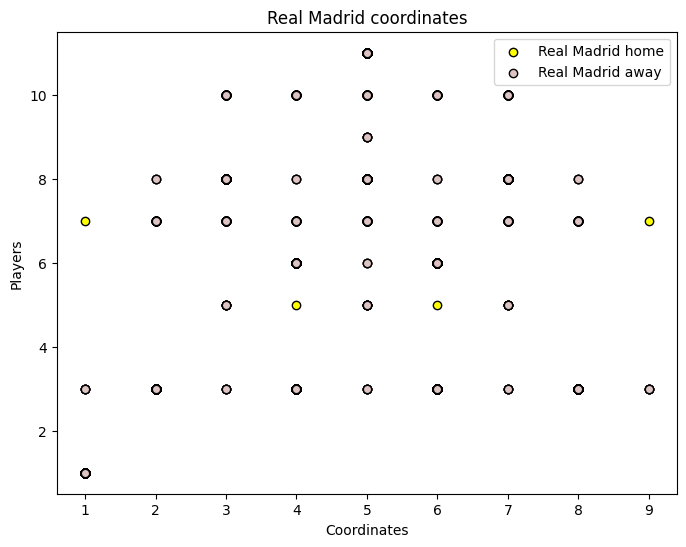

In [140]:
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates('Real Madrid CF', 'home', '#FFFF00', 'Real Madrid home')
scatter_players_coordinates('Real Madrid CF', 'away', '#dec3c3', 'Real Madrid away')
plotting_data('Coordinates', 'Players', 'Real Madrid coordinates')

**Q5** -> the relation between players coordinates and scoring goals is directly proportional at four points [(2, 8), (3, 5), (8, 8), (7, 5)] which make trapezium shape 

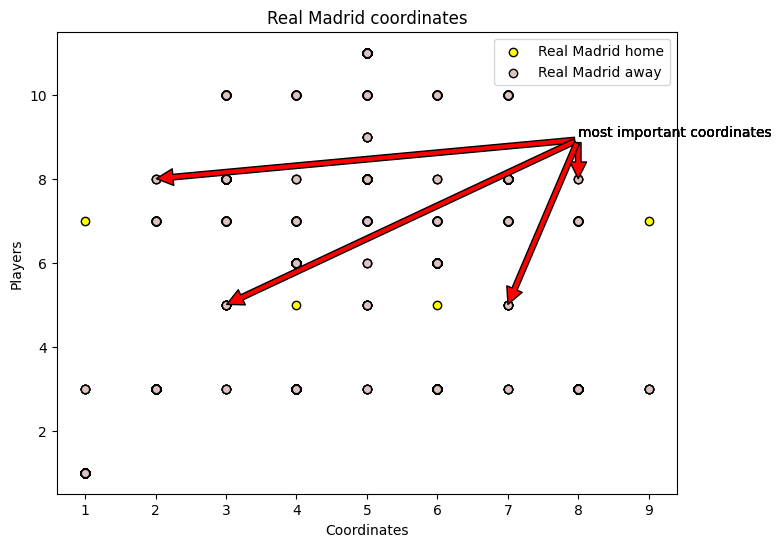

In [141]:
#plotting spain Real Madrid players coordinates
fig, mm = plt.subplots(figsize =(8,6))
scatter_players_coordinates('Real Madrid CF', 'home', '#FFFF00', 'Real Madrid home')
scatter_players_coordinates('Real Madrid CF', 'away', '#dec3c3', 'Real Madrid away')
#annotate important coordinate points[(2, 8), (3, 5), (8, 8), (7, 5)]
[plt.annotate('most important coordinates', xy= point, arrowprops= {'facecolor' : 'red', 'shrink' : 0.002}, xytext= (8, 9)) for point in [(2, 8), (3, 5), (8, 8), (7, 5)]]
plotting_data('Coordinates', 'Players', 'Real Madrid coordinates')

**Q6** -> the relation between players numbers and scoring goals is inversly proportional , you can measure it with the mean of each team players number

### Second, How to increase your team goals?
> According to last analysis you must: <br>
> 1- concentrate players concentration at middle of stadium to get more control to match than another team, to make that you must be more concentrated than your rival at [(2, 8), (3, 5), (8, 8), (7, 5)] trapezium, atleast with one more point and focus on two points [(3, 5), (7, 5)] becouse they play as a defense and play maker for attackers. <br>
> 2- decrease your players numbers in match as possible to be able to score more goals

### Third, limitation
> Let's be more obvious, this analysis may has a limitaion at analysis of player numbers that make it perhaps less useful, However this limitaion in analysis will not make a high distroy at all, best wishes